# Most of the scariao we use PowerTransFormer To achieve Normal Dirtibution.
### Box-Cox transform
### Yeo-Johnson transform.
### Both Box-Cox and Yeo-Johnson transform non-normal distribution into a normal distribution. However, Box-Cox requires all samples to be positive and not equal to zero, while Yeo-Johnson has no restrictions.

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Plot QQplot

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score # For Regression
from sklearn.metrics import accuracy_score # For Classification

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

from sklearn.preprocessing import PowerTransformer

### Accuracy score is make for classification problems: ... R2.score is made for continous variables.

In [11]:
df = pd.read_csv("concrete_data.csv")

df.head()

In [19]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [20]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
X= df.drop(columns="Strength")

In [23]:
y= df.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train The model without transformed

In [28]:
m1 = LinearRegression()

m1.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = m1.predict(X_test)

In [30]:
r2_score(y_test,y_pred)

0.627553179231485

# Train The model with transformed.

In [41]:
pt = PowerTransformer()

In [42]:
X_train_tf = pt.fit_transform(X_train)
X_test_tf = pt.transform(X_test)

In [43]:
m2 = LinearRegression()

In [44]:
m2.fit(X_train_tf,y_train)

LinearRegression()

In [45]:
y_pred = m2.predict(X_test_tf)

In [47]:
print("Accuracy After trns :",r2_score(y_test,y_pred))

Accuracy After trns : 0.8161906512004999


In [60]:
type(X_train_tf)

numpy.ndarray

In [65]:
X_train_tf = pd.DataFrame(X_train_tf,columns=X_train.columns)

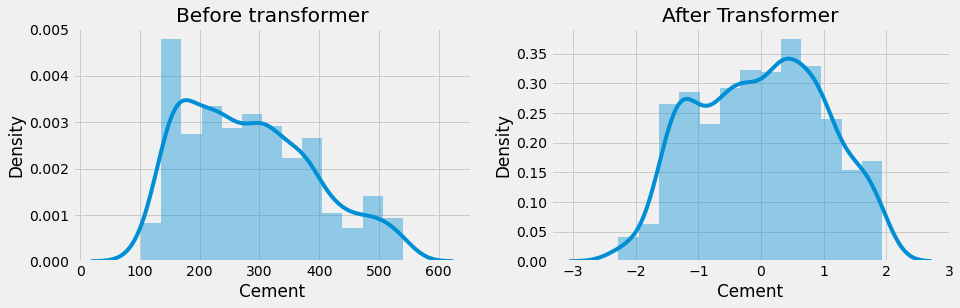

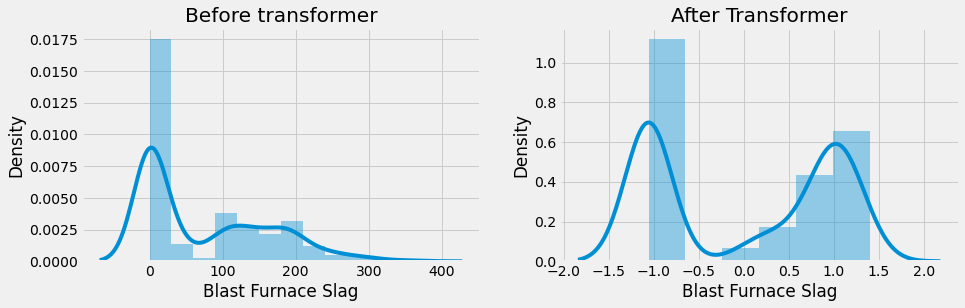

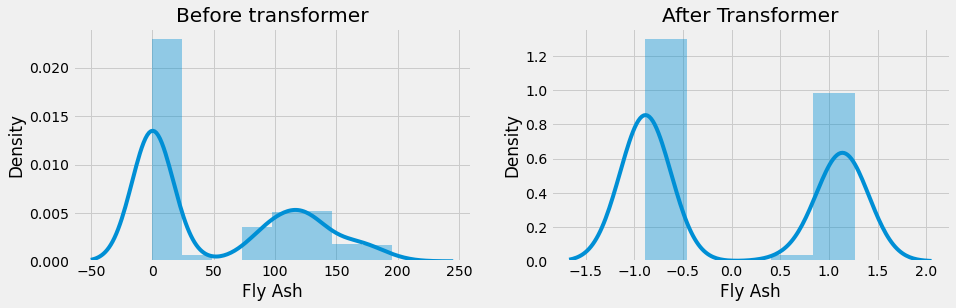

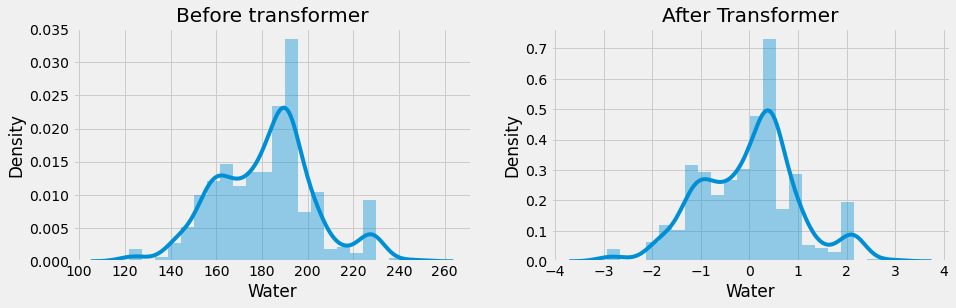

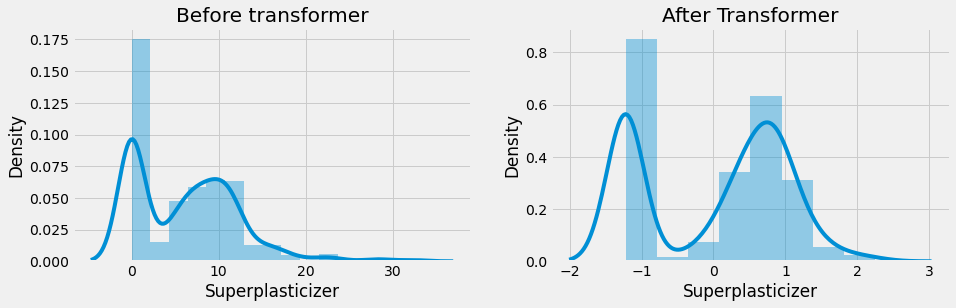

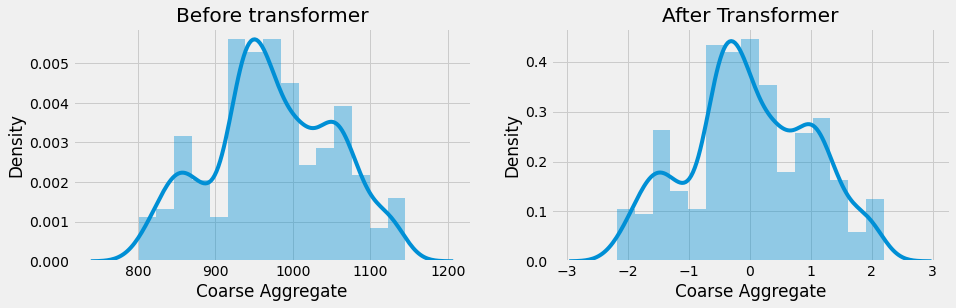

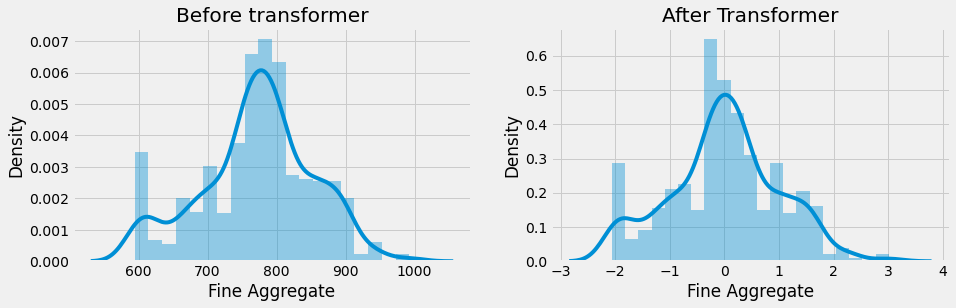

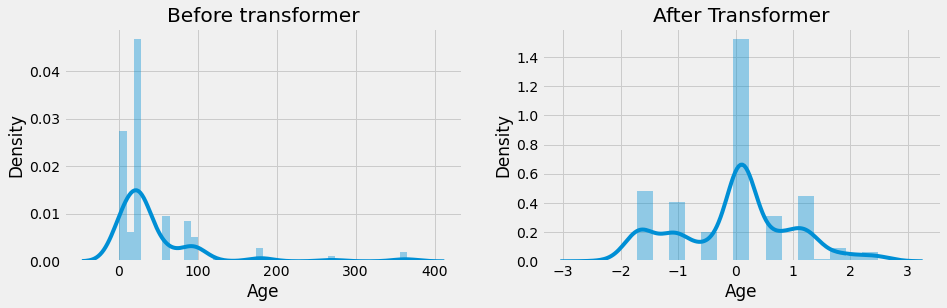

In [66]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("Before transformer")

    plt.subplot(122)
    sns.distplot(X_train_tf[col])
    plt.title("After Transformer")

    plt.show()

# Applying cross val score on transformed data.

In [67]:

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500863

# Applying cross val score without transformed data.

In [70]:
cross_val_score(m1,X,y,scoring="r2").mean()

0.4609940491662866